In [9]:
import pandas as pd
from matplotlib.widgets import CheckButtons
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

import ipywidgets as wg
from IPython.display import display

  Character    R1    R2    R3
0         C  1218  1289  5334
1         H  1415  2489  3568
2         A  1646  2325  3577
3         T  1403  4587  1277
4       C.1  1575  6322  3955
5       H.1  1418  3267  4732
6       A.1  1303  4683  8442
7         I  1323  2557  4582


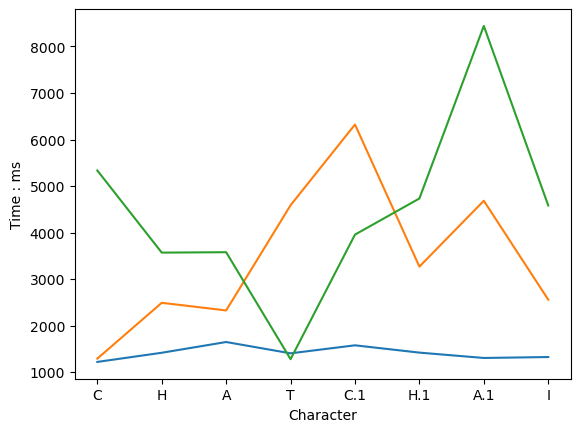

In [10]:
# รับข้อมูล test
testIden = pd.read_csv("1 key/a1_test.csv")

print(testIden)
plt.xlabel("Character")
plt.ylabel("Time : ms")

plt.plot(testIden.Character, testIden.R1, label='Round 1')
plt.plot(testIden.Character, testIden.R2, label='Round 2')
plt.plot(testIden.Character, testIden.R3, label='Round 3')
plt.show()

In [11]:
# แสดง Average และ Treshold ของแต่ละ user : a1
testIdenAvg = pd.read_csv("1 key/Avg_a1_with_treshold.csv")

print(testIdenAvg)

   Character         Time     Per_T_5      Per_B_5      Per_T_10     Per_B_10  \
0          A  3572.000000  3750.60000  3393.400000   3929.200000  3214.800000   
1          C  1218.000000  1278.90000  1157.100000   1339.800000  1096.200000   
2          D  2302.000000  2417.10000  2186.900000   2532.200000  2071.800000   
3          E  7386.250000  7755.56250  7016.937500   8124.875000  6647.625000   
4          F   878.000000   921.90000   834.100000    965.800000   790.200000   
5          G  1425.000000  1496.25000  1353.750000   1567.500000  1282.500000   
6          H  8836.000000  9277.80000  8394.200000   9719.600000  7952.400000   
7          I  3629.250000  3810.71250  3447.787500   3992.175000  3266.325000   
8          J  2228.000000  2339.40000  2116.600000   2450.800000  2005.200000   
9          L  1634.000000  1715.70000  1552.300000   1797.400000  1470.600000   
10         N  5222.125000  5483.23125  4961.018750   5744.337500  4699.912500   
11         O   822.000000   

In [12]:
check_user = pd.DataFrame()

# เก็บค่าที่อยู่นอกหรือใน teshold
checker = []
check_user['Character'] = testIden['Character'] 
    
# แปลงเป็น dic
data = dict(zip(testIden['Character'],testIden['R1']))

t5 = dict(zip(testIdenAvg['Character'],testIdenAvg['Per_T_5']))
b5 = dict(zip(testIdenAvg['Character'],testIdenAvg['Per_B_5']))

t10 = dict(zip(testIdenAvg['Character'],testIdenAvg['Per_T_10']))
b10 = dict(zip(testIdenAvg['Character'],testIdenAvg['Per_B_10']))

t15 = dict(zip(testIdenAvg['Character'],testIdenAvg['Per_T_15']))
b15 = dict(zip(testIdenAvg['Character'],testIdenAvg['Per_B_15']))

t20 = dict(zip(testIdenAvg['Character'],testIdenAvg['Per_T_20']))
b20 = dict(zip(testIdenAvg['Character'],testIdenAvg['Per_B_20']))

# ฟังก์ชันวนเช็คค่า
def check5():
    for k,v in data.items():
        if v > t5[k[0]] or v < b5[k[0]]:
            checker.append(0)
        else :
            checker.append(1)
            
def check10():
    for k,v in data.items():
        if v > t10[k[0]] or v < b10[k[0]]:
            checker.append(0)
        else :
            checker.append(1)

def check15():
    for k,v in data.items():
        if v > t15[k[0]] or v < b15[k[0]]:
            checker.append(0)
        else :
            checker.append(1)
            
def check20():
    for k,v in data.items():
        if v > t20[k[0]] or v < b20[k[0]]:
            checker.append(0)
        else :
            checker.append(1)

# เรียกฟังก์ชัน
check20()
check_user['checker'] = checker

check_user

,Character,checker
0,C,1
1,H,0
2,A,0
3,T,0
4,C.1,0
5,H.1,0
6,A.1,0
7,I,0


In [13]:
# นับจำนวนที่อยู่ในและนอกteshold
# 1 = in >> real user
# 0 = out >> fake user

num = check_user['checker'].to_list()
num1 = 0
num0 = 0
for i in num:
    if i== 1:
        num1 += 1
    elif i == 0:
        num0 += 1

user = num1 / (num1+num0)*100

if user > 50:
    result = "real user"
elif user == 50:
    result = "unidentify"
elif user < 50:
    result = "fake user"
    
    
print("true = ",num1)
print("false = ",num0)    
print(f'{user:.2f}% = {result}')

true =  1
false =  7
12.50% = fake user


In [14]:
# dataframe สำหรับทำกราฟ
dfThreshold = pd.DataFrame()

# เก็บค่า
dfThreshold['Character'] = testIden['Character']
lAvg = []
lt5 = []
lb5 = []
lt10 = []
lb10 = []
lt15 = []
lb15 = []
lt20 = []
lb20 = []

# แปลงเป็น dic
avg = dict(zip(testIdenAvg['Character'],testIdenAvg['Time']))

t5 = dict(zip(testIdenAvg['Character'],testIdenAvg['Per_T_5']))
b5 = dict(zip(testIdenAvg['Character'],testIdenAvg['Per_B_5']))

t10 = dict(zip(testIdenAvg['Character'],testIdenAvg['Per_T_10']))
b10 = dict(zip(testIdenAvg['Character'],testIdenAvg['Per_B_10']))

t15 = dict(zip(testIdenAvg['Character'],testIdenAvg['Per_T_15']))
b15 = dict(zip(testIdenAvg['Character'],testIdenAvg['Per_B_15']))

t20 = dict(zip(testIdenAvg['Character'],testIdenAvg['Per_T_20']))
b20 = dict(zip(testIdenAvg['Character'],testIdenAvg['Per_B_20']))


for k,v in data.items():
    lAvg.append(avg[k[0]])
    lt5.append(t5[k[0]])
    lb5.append(b5[k[0]])
    
    lt10.append(t10[k[0]])
    lb10.append(b10[k[0]])
    
    lt15.append(t15[k[0]])
    lb15.append(b15[k[0]])
    
    lt20.append(t20[k[0]])
    lb20.append(b20[k[0]])

dfThreshold['Avg'] = lAvg
dfThreshold['Per_T_5'] = lt5
dfThreshold['Per_B_5'] = lb5

dfThreshold['Per_T_10'] = lt10
dfThreshold['Per_B_10'] = lb10

dfThreshold['Per_T_15'] = lt15
dfThreshold['Per_B_15'] = lb15

dfThreshold['Per_T_20'] = lt20
dfThreshold['Per_B_20'] = lb20

dfThreshold

,Character,Avg,Per_T_5,Per_B_5,Per_T_10,Per_B_10,Per_T_15,Per_B_15,Per_T_20,Per_B_20
0,C,1218.00,1278.9000,1157.1000,1339.800,1096.200,1400.7000,1035.3000,1461.6,974.4
1,H,8836.00,9277.8000,8394.2000,9719.600,7952.400,10161.4000,7510.6000,10603.2,7068.8
2,A,3572.00,3750.6000,3393.4000,3929.200,3214.800,4107.8000,3036.2000,4286.4,2857.6
3,T,9229.00,9690.4500,8767.5500,10151.900,8306.100,10613.3500,7844.6500,11074.8,7383.2
4,C.1,1218.00,1278.9000,1157.1000,1339.800,1096.200,1400.7000,1035.3000,1461.6,974.4
5,H.1,8836.00,9277.8000,8394.2000,9719.600,7952.400,10161.4000,7510.6000,10603.2,7068.8
6,A.1,3572.00,3750.6000,3393.4000,3929.200,3214.800,4107.8000,3036.2000,4286.4,2857.6
7,I,3629.25,3810.7125,3447.7875,3992.175,3266.325,4173.6375,3084.8625,4355.1,2903.4


In [15]:
def threshold(Per5 = False ,Per10 = False ,Per15 = False ,Per20 = True):
    fig, ax = plt.subplots(figsize=(10,5))
    plt.scatter(dfThreshold['Character'],dfThreshold['Avg'])
    plt.scatter(testIden['Character'],testIden['R1'],marker='+')
    
    plt.title("1key Average Time")
    plt.xlabel("Character")
    plt.ylabel("Time : ms")

    if Per5:
        plt.plot(dfThreshold['Character'],dfThreshold['Per_T_5'],color="#E00296")
        plt.plot(dfThreshold['Character'],dfThreshold['Per_B_5'],color="#E00296")
        
    if Per10:
        plt.plot(dfThreshold['Character'],dfThreshold['Per_T_10'],color="red")
        plt.plot(dfThreshold['Character'],dfThreshold['Per_B_10'],color="red")
        
    if Per15:
        plt.plot(dfThreshold['Character'],dfThreshold['Per_T_15'],color="orange")
        plt.plot(dfThreshold['Character'],dfThreshold['Per_B_15'],color="orange")
        
    if Per20:
        plt.plot(dfThreshold['Character'],dfThreshold['Per_T_20'],color="green")
        plt.plot(dfThreshold['Character'],dfThreshold['Per_B_20'],color="green")
        

    plt.show()

wg.interact(threshold ,Per5 = False ,Per10 = False ,Per15 = False ,Per20 = True)

interactive(children=(Checkbox(value=False, description='Per5'), Checkbox(value=False, description='Per10'), C…

<function __main__.threshold(Per5=False, Per10=False, Per15=False, Per20=True)>